In [108]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split

In [109]:
df = pd.read_csv('HR_comma_sep.csv')

In [110]:
# Perform data quality checks by checking for missing values, if any. df.head()

df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [111]:
numeric = df.select_dtypes(include='number')
numeric

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0



### 2- Understand what factors contributed most to employee turnover at EDA. 

In [ ]:
# - Draw a heatmap of the correlation matrix between all numerical features or columns in the data. 
corr = numeric.corr()
sns.heatmap(corr, cmap='coolwarm', fmt='.2f' )
plt.title("Correlation Heatmap for all values")
plt.show()

In [ ]:
# low satisfaction  vs left --> string negative correlation, satisfaction decreases and plrobablity of leaving increase
co = pd.DataFrame(corr)
co

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


#### Draw the distribution plot of:

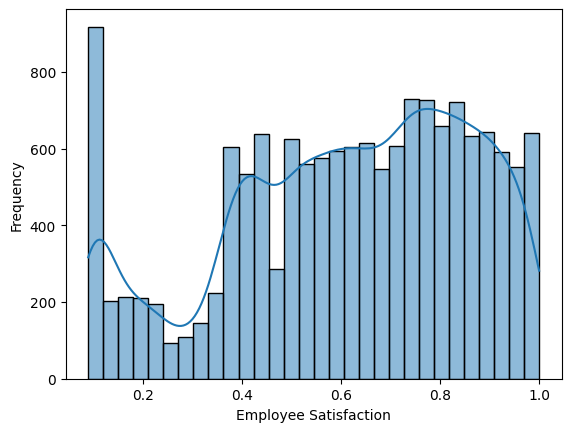

In [ ]:
# - Employee Satisfaction (use column satisfaction_level) 
sns.histplot(df['satisfaction_level'], bins=30, kde=True)
plt.xlabel('Employee Satisfaction')
plt.ylabel('Frequency')
plt.show()

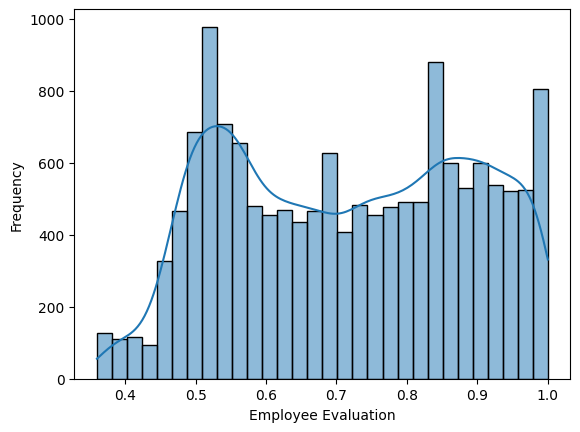

In [ ]:
#    - Employee Evaluation (use column last_evaluation) 

sns.histplot(df['last_evaluation'],bins=30, kde=True)
plt.xlabel('Employee Evaluation')
plt.ylabel('Frequency')
plt.show()

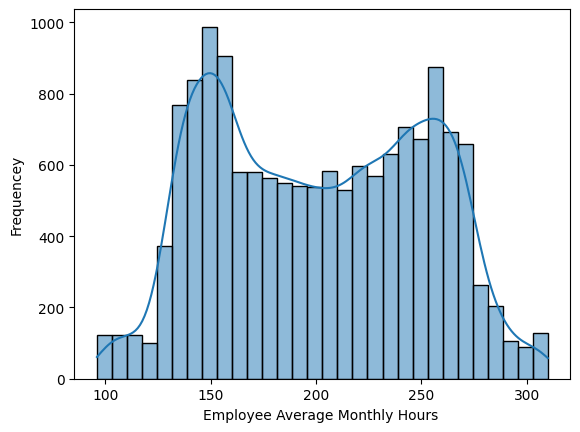

In [ ]:
#    - Employee Average Monthly Hours (use column average_monthly_hours)
sns.histplot(df['average_montly_hours'], bins=30, kde=True)
plt.xlabel('Employee Average Monthly Hours ')
plt.ylabel('Frequencey')
plt.show()

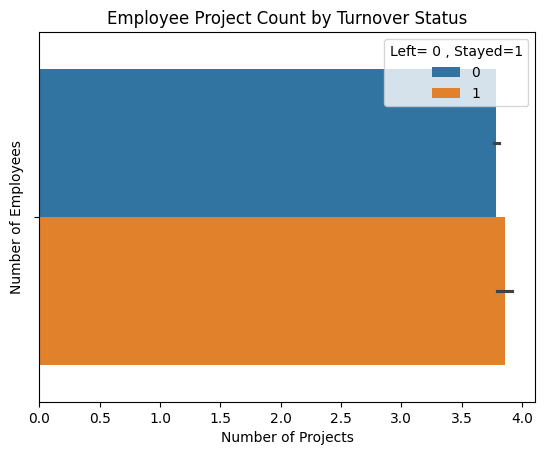

In [ ]:
#   - Draw the bar plot of the employee project count of both employees who left and stayed in the organization
#      (use column number_project and hue column left), and give your inferences from the plot

sns.barplot(
    data=df,
    x='number_project',
    hue= 'left'
)
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.title('Employee Project Count by Turnover Status')
plt.legend(loc='best',title='Left= 0 , Stayed=1')
plt.show()

### 3- Perform clustering of employees who left based on their satisfaction and evaluation. 

In [ ]:
# Do K-means clustering of employees who left the company into the appropriate number of clusters.

left_employe = df[df['left'] == 1]
left_employe

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
# - Choose columns satisfaction_level, last_evaluation, and left. 

#  Using only the clustering features (NOT 'left') and it shows only the employess who left
#  but left is not in data anymore in that way so i can use it to cluster it
columns_cluster = left_employe[['satisfaction_level', 'last_evaluation']]
columns_cluster.head(3)

,satisfaction_level,last_evaluation
0,0.38,0.53
1,0.80,0.86
2,0.11,0.88


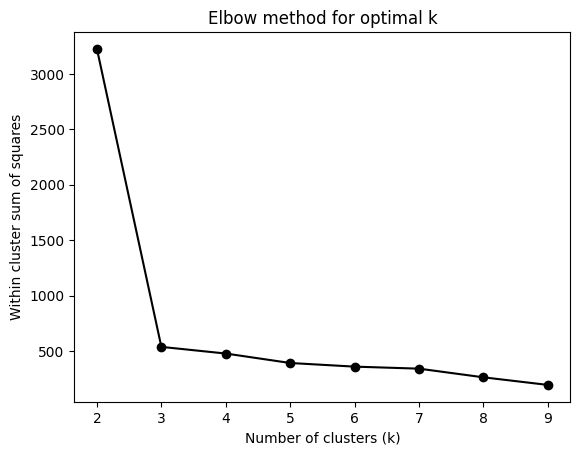

[3226.895117518131, 536.2887782994451, 476.11423015621676, 390.72422194221866, 357.8683353642331, 339.5987652122533, 261.3838572371309, 192.73198585121713]


In [ ]:
# lets do elbow method to pick best cluster

X_scaled = StandardScaler().fit_transform(columns_cluster)

k_range= range(2,10)
intertias =[]

for k in k_range:

    kmeans = KMeans(n_clusters=k, random_state=315) 
    kmeans.fit(X_scaled )
    intertias.append(kmeans.inertia_)

plt.plot(k_range, intertias, marker="o", color='black')
plt.title('Elbow method for optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within cluster sum of squares')
plt.show()
print(intertias)


In [ ]:
# - Fit a `KMeans` model with the chosen k value using `random_state=315`
# - Add the cluster labels as a new column to the original dataframe
# - Create a visualization to show the distribution of data points across clusters

kmeans_2 = KMeans(n_clusters=3, random_state=315)
labels = kmeans_2.fit_predict(X_scaled)
print(len(labels))


left_employe['cluster'] = labels

left_employe.head()

3571


/var/folders/jf/8gpbpnm56tvbxy24tplw57g80000gn/T/ipykernel_26952/301726827.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_employe['cluster'] = labels


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,cluster
0,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,1


In [ ]:
print("Clusters", left_employe['cluster'].value_counts().sort_index)

Clusters <bound method Series.sort_index of cluster
1    1667
0     965
2     939
Name: count, dtype: int64>


In [ ]:
#  - Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters. 
cluster_summary = (
    left_employe
    .groupby('cluster')[['satisfaction_level', 'last_evaluation']]
    .mean()
)

cluster_summary


,satisfaction_level,last_evaluation
cluster,,
0,0.808031,0.916415
1,0.412304,0.517265
2,0.111321,0.870884


In [ ]:
df['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

### 4- Handle the left Class Imbalance using the SMOTE technique. 

In [ ]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [ ]:

X = df.drop(columns='left')
y = df['left']



,sales,salary
0,sales,low
1,sales,medium
2,sales,medium


In [ ]:
# splitig data before doing feature enginering to avoid data leake

X_train, X_test , y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=123,
    stratify=y     # ensures that both training and test sets have the same proportion of the target classes, which is essential for imbalanced datasets.
)


In [ ]:
# Pre-process the data by converting categorical columns to numerical columns by: 
categorical_col_X_train = X_train.select_dtypes(include=['object']).columns
categorical_col_X_test  = X_test.select_dtypes(include=['object']).columns







In [ ]:
# - Applying get_dummies() to the categorical variables 
X_train_cat = pd.get_dummies(X_train[categorical_col_X_train ], drop_first=True,  dtype=int)
X_train_cat.head(3)

,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
3553,0,0,0,0,0,0,0,0,1,1,0
2112,0,0,0,0,0,0,0,1,0,1,0
1794,0,0,0,0,0,0,0,0,1,1,0


In [ ]:
X_test_cat = pd.get_dummies(X_train[categorical_col_X_test], drop_first=True,  dtype=int)
X_test_cat.head(3)

,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
3553,0,0,0,0,0,0,0,0,1,1,0
2112,0,0,0,0,0,0,0,1,0,1,0
1794,0,0,0,0,0,0,0,0,1,1,0


In [ ]:
X_train_cat, X_test_cat = X_train_cat.align(
    X_test_cat,
    join='left', # join='left' means: Use the TRAIN set as the reference.
    axis=1,
    fill_value=0
)


In [ ]:
# - Combining categorical variables and numeric variables 

# Combining numeric + encoded categorical to train data

numeric_col = X_train.select_dtypes(include='number').columns


X_train_processed = pd.concat(
    [X_train[numeric_col], X_train_cat],
    axis=1
)

X_test_processed = pd.concat(
    [X_test[numeric_col], X_test_cat],
    axis=1
)

X_train_processed.head(3)



,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
3553,0.31,0.64,6,183,2,1,0,0,0,0,0,0,0,0,0,1,1,0
2112,0.59,0.81,4,200,2,0,0,0,0,0,0,0,0,0,1,0,1,0
1794,0.38,0.51,2,159,3,0,0,0,0,0,0,0,0,0,0,1,1,0


In [ ]:
# - Up-sample the train dataset using the SMOTE technique from the imblearn module.

